# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [4]:
import numpy as np 
import pandas as pd
import tensorflow as tf 
import seaborn as sns


In [95]:
df = pd.read_csv('/content/drive/MyDrive/ML_Datasets-main/compresive_strength_concrete.csv')

In [96]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [97]:
df.isnull().any()

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

In [98]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [100]:
df.keys()

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [101]:
# split dataframe into input and output
X=df.iloc[:,:8]

y=df.iloc[:,-1]

In [102]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

In [103]:
mean = X.mean(axis=0)
X-= mean
std = X.std()
X/= std


In [104]:
y_mean=y.mean(axis=0)
y_std=y.std(axis=0)
y-=y_mean
y/=y_std

In [105]:
y

0       2.644123
1       1.560663
2       0.266498
3       0.313188
4       0.507732
          ...   
1025    0.506535
1026   -0.277627
1027   -0.725377
1028   -0.182450
1029   -0.204598
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe297aa14d0>,
      dtype=object)

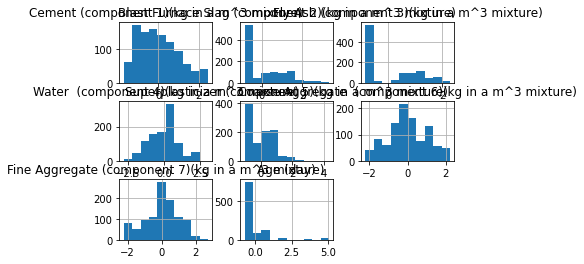

In [106]:
X.hist()

In [107]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels=train_test_split(X, y, test_size=0.3, random_state=1)

In [108]:
train_labels
test_labels

339    -0.832526
244    -0.951048
882     0.037235
567    -1.428129
923     0.240758
          ...   
1018    0.086919
1015    0.994391
341     0.693297
750     0.495161
937     0.058785
Name: Concrete compressive strength(MPa, megapascals) , Length: 309, dtype: float64

In [109]:
X_train= np.asarray(train_data).astype('float32')
X_test= np.asarray(test_data).astype('float32')
y_train= np.asarray(train_labels).astype('float32')
y_test= np.asarray(test_labels).astype('float32')


In [117]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu',input_shape=(X_train.shape[1],)))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [118]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [119]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_28 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [120]:
histroy=model.fit(X_train, y_train,epochs=10, batch_size=1, verbose=0, validation_split=0.2)

In [121]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.2839 - mae: 0.3993


[0.28394943475723267, 0.39927786588668823]

In [123]:
history=histroy

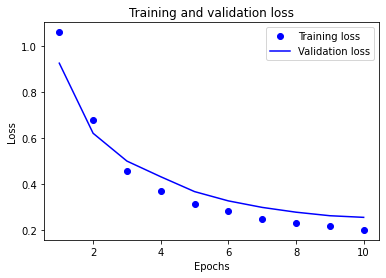

In [124]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [126]:
pred=model.predict(X_test)

In [127]:
pred

array([[-4.41198856e-01],
       [-1.12083459e+00],
       [-7.53240943e-01],
       [-1.58048415e+00],
       [ 3.06120723e-01],
       [ 1.47214234e+00],
       [-7.07495332e-01],
       [ 2.80280203e-01],
       [-5.41782379e-03],
       [-1.00839019e+00],
       [ 8.07955742e-01],
       [-1.38297987e+00],
       [-2.68749267e-01],
       [-4.53870505e-01],
       [-1.66726482e+00],
       [-9.73026514e-01],
       [ 8.17123413e-01],
       [ 1.23984575e+00],
       [ 1.64509606e+00],
       [-2.82957911e-01],
       [-1.01743233e+00],
       [ 5.81590652e-01],
       [-1.19371068e+00],
       [ 1.38464296e+00],
       [ 1.47146213e+00],
       [ 4.86581922e-02],
       [-3.02138478e-01],
       [-2.72530884e-01],
       [ 2.14635402e-01],
       [-1.10259020e+00],
       [ 9.19492364e-01],
       [ 8.05686712e-01],
       [-8.92550707e-01],
       [ 2.89962381e-01],
       [ 9.19842839e-01],
       [ 2.75662959e-01],
       [-1.22662330e+00],
       [-3.79887193e-01],
       [-1.2

In [130]:
y_test

array([-0.8325258 , -0.9510479 ,  0.03723503, -1.4281294 ,  0.24075787,
        1.8635532 , -0.8762233 ,  0.9758345 ,  0.19406733, -0.83791316,
        0.20424348, -1.2443602 , -0.6415735 , -0.5296359 , -1.525102  ,
       -0.5362205 ,  0.15515856,  1.2458016 ,  1.908448  ,  0.07015784,
       -0.6481581 ,  0.92435515, -1.1000985 ,  1.387669  ,  1.5552759 ,
        0.62445825,  0.2000533 , -0.17945693, -0.12079447, -1.1132675 ,
        0.47181615,  0.6501979 , -0.78942686, -0.73615175, -0.14473833,
       -0.12558323, -0.9217167 , -0.5368191 , -0.61403805, -0.9031602 ,
       -0.14473833, -1.2467546 ,  0.14378522,  0.16832769, -0.03519515,
       -0.40871942, -0.24949273, -0.5793194 , -0.43206468,  0.64780354,
       -0.7768563 , -0.00346954,  1.5624591 ,  0.91118604,  1.2499917 ,
       -1.5227077 ,  0.41794246, -0.8834065 , -0.15730886,  0.5137179 ,
        1.0698141 ,  0.47181615,  1.1051314 ,  1.2116815 , -0.6727005 ,
       -0.12318885,  1.2044984 ,  0.11924277, -0.71639806, -0.56

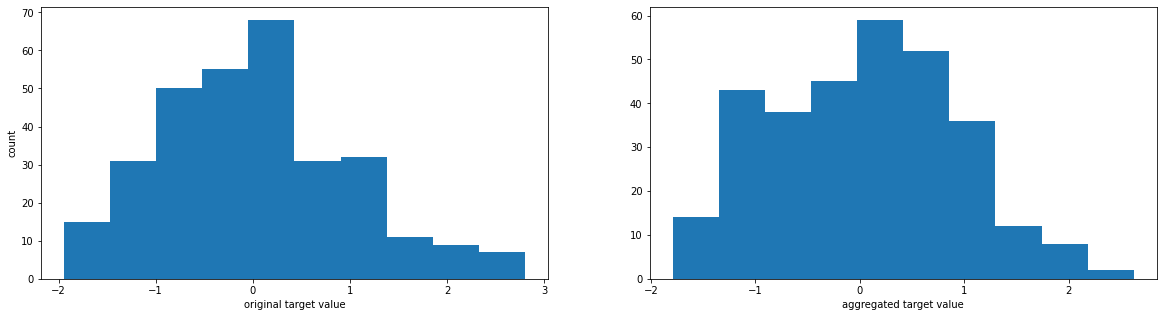

In [131]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(y_test)
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(pred)
plt.xlabel('aggregated target value')
plt.show()